https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');



In [2]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

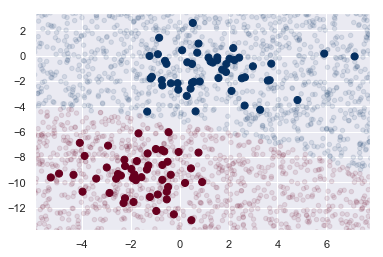

In [3]:
#generrar unos datos para testear la predicción
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [4]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

Multinomial Naive Bayes

<p>In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the TF-IDF vectorizer (discussed in Feature Engineering), and create a pipeline that attaches it to a multinomial naive Bayes classifier:</p>

From: revdak@netcom.com (D. Andrew Kille)
Subject: Re: Serbian genocide Work of God?
Organization: NETCOM On-line Communication Services (408 241-9760 guest)
Lines: 22

James Sledd (jsledd@ssdc.sas.upenn.edu) wrote:
: Are the Serbs doing the work of God?  Hmm...

: I've been wondering if anyone would ever ask the question,

: Are the governments of the United States and Europe not moving
: to end the ethnic cleansing by the Serbs because the targets are
: muslims?

: Can/Does God use those who are not following him to accomplish
: tasks for him?  Esp those tasks that are punative?

: James Sledd
: no cute sig....  but I'm working on it.

Are you suggesting that God supports genocide?
Perhaps the Germans were "punishing" Jews on God's behalf?

Any God who works that way is indescribably evil, and unworthy of
my worship or faith.

revdak@netcom.com



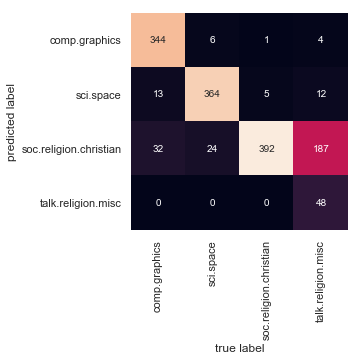

In [5]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

print(train.data[3])

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)
labels = model.predict(test.data)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

<h3>para las predicciones</h3>


In [6]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [7]:
predict_category('sending a payload to the ISS')


'sci.space'

In [8]:
predict_category('discussing islam vs atheism')


'soc.religion.christian'

In [14]:
predict_category('discussing science and atheism')


'soc.religion.christian'